## IMPORTING LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

## IMPORTING DATASET

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Design Credits/rough_data_set.csv')
dataset

,Number of gates,Number of flops,Number of Test Vectors,Equivalent Area of Block,Test Power\n(in uJoules)
0,40,4,3,200,6
1,100,10,5,600,16
2,110,10,5,660,12
3,150,16,6,800,20
4,150,15,7,800,15
5,170,17,7,850,34
6,200,19,7,1000,23
7,210,20,8,1050,33
8,250,26,8,1260,43
9,300,29,8,1450,45


In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

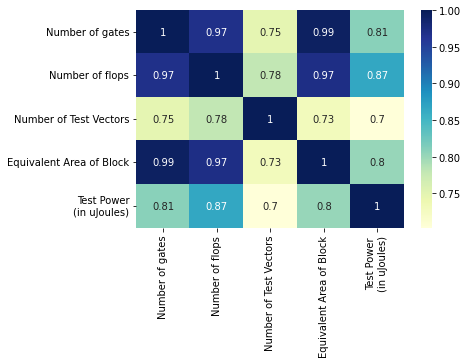

In [ ]:
sb.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

## Splitting into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [ ]:
MSE_list = dict()

## least square regression

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
MSE_list["linear regression"] = MSE(y_pred,y_test)

In [ ]:
print(MSE(y_pred,y_test))

89.01358763476526


In [ ]:
print(range(len(y_test)))

range(0, 5)


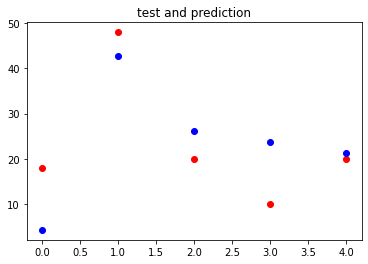

In [ ]:
plt.scatter(range(len(y_test)),y_test,color = 'red')
plt.scatter(range(len(y_pred)),y_pred,color = 'blue')
plt.title("test and prediction")
plt.show()

## Ridge regression

In [ ]:
reg_ridge = Ridge()
reg_ridge.fit(x_train,y_train)
y_pred_ridge = reg_ridge.predict(x_test)
MSE_list["ridge regression"] = MSE(y_pred_ridge,y_test)

In [ ]:
print(MSE(y_pred_ridge,y_test))

85.23826408485105


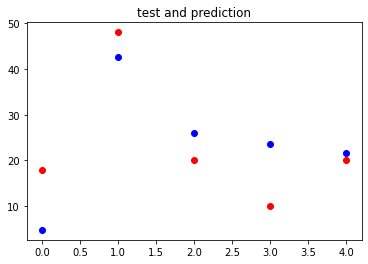

In [ ]:
plt.scatter(range(len(y_test)),y_test,color = 'red')
plt.scatter(range(len(y_pred_ridge)),y_pred_ridge,color = 'blue')
plt.title("test and prediction")
plt.show()

## Nearest neighbour regression

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train,y_train)
y_pred_knn = neigh.predict(x_test)
MSE_list["KNN"] = MSE(y_pred_knn,y_test)

In [ ]:
print(MSE(y_pred_knn,y_test))

73.57777777777778


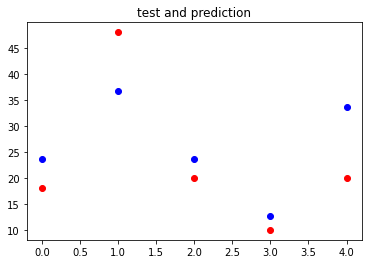

In [ ]:
plt.scatter(range(len(y_test)),y_test,color = 'red')
plt.scatter(range(len(y_pred_knn)),y_pred_knn,color = 'blue')
plt.title("test and prediction")
plt.show()

## Neural network regression 

In [ ]:
reg_nnr = MLPRegressor(random_state=1,max_iter=2000)
reg_nnr.fit(x_train,y_train)
y_predict_nnr = reg_nnr.predict(x_test)
MSE_list["neural network regression"] = MSE(y_predict_nnr,y_test)

In [ ]:
print(MSE(y_predict_nnr,y_test))

60.92217970360518


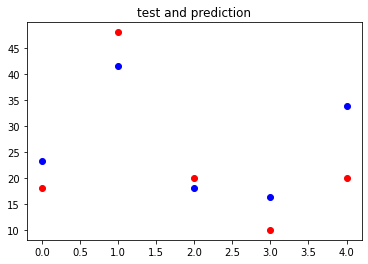

In [ ]:
plt.scatter(range(len(y_test)),y_test,color = 'red')
plt.scatter(range(len(y_predict_nnr)),y_predict_nnr,color = 'blue')
plt.title("test and prediction")
plt.show()

In [ ]:
# printing all mse values with models
mse = pd.DataFrame({"Models" : MSE_list.keys() , "MSE" : MSE_list.values()})
mse

,Models,MSE
0,linear regression,89.013588
1,ridge regression,85.238264
2,KNN,73.577778
3,neural network regression,60.922180
